# Lab 3
Ali Tejani, amt3639

Caroline Yao, chy253

In [197]:
import numpy as np
import pandas as pd

## Problem 1: Linear Algebra in Python

### 1. Checking if a vector is in a subspace

In [198]:
# create matrix out of vectors in span
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
subspace = np.column_stack((v1,v2,v3,v4))
print "Subspace rank is {}".format(np.linalg.matrix_rank(subspace))

Subspace rank is 2


In [199]:
vInS = np.array([1, 1, 3, 3])
vNotInS = np.array([1, 1, 0, 0])
s1 = np.concatenate((subspace,np.array([vInS]).T), axis=1)
s2 = np.concatenate((subspace,np.array([vNotInS]).T), axis=1)
print np.linalg.matrix_rank(s1)
print np.linalg.matrix_rank(s2)
print "{} is {}in Span(v1,v2,v3,v4)".format(vInS,'' if np.linalg.matrix_rank(s1) == 2 else 'not ')
print "{} is {}in Span(v1,v2,v3,v4)".format(vNotInS,'' if np.linalg.matrix_rank(s2) == 2 else 'not ')

2
3
[1 1 3 3] is in Span(v1,v2,v3,v4)
[1 1 0 0] is not in Span(v1,v2,v3,v4)


To determine if a vector v is in a subspace S, you can add the vector to the subspace matrix and compute the rank. If the rank is higher than the rank of the subspace matrix, v is not in the subspace.

### 2. Finding the dimension of a subspace

In [200]:
print "Subspace dimension is {}".format(np.linalg.matrix_rank(subspace))

Subspace dimension is 2


### 3. Finding an orthonormal basis for a subspace

In [201]:
subspace = np.column_stack((v1,v2))
q,r = np.linalg.qr(subspace)
e1 = q.T[0]
e2 = q.T[1]
print "Orthonormal basis of S is\n ({}, \n{})".format(e1,e2)


Orthonormal basis of S is
 ([-0.18257419 -0.36514837 -0.54772256 -0.73029674], 
[ 0.2236068  -0.67082039  0.67082039 -0.2236068 ])


### 4. Finding the closest vector in a subspace to another vector

min(||x − z∗||2) for x∈S where z∗ = [1, 0, 0, 0]

To solve the optimization problem, we can project z* onto our subspace, and the resulting vector will be the closest vector in S to z*.

In [202]:
z = np.array([1,0,0,0])
zProje1 = np.dot(z,e1)*e1
zProje2 = np.dot(z,e2)*e2
zProjS = zProje1 + zProje2
zProjS
s1 = np.concatenate((subspace,np.array([zProjS]).T), axis=1)
print "{} is the closest vector in S to z*".format(zProjS,'' if np.linalg.matrix_rank(s1) == 2 else 'not ')

[ 0.08333333 -0.08333333  0.25        0.08333333] is the closest vector in S to z*


## Problem 2: Scraping, Entropy and ICML papers

After scraping the pdfs from http://proceedings.mlr.press/v70/ and converting them to text, we will create a corpus from these files.

In [72]:
import nltk
from nltk.corpus import PlaintextCorpusReader,stopwords,wordnet
from nltk.util import ngrams
corpus_path = "txts"
wordlists = PlaintextCorpusReader(corpus_path, '.*')
words = wordlists.words(fileids=wordlists.fileids())
stops = stopwords.words('english')

### 1. Finding the most common words

We created a frequency distribution of all words and found the most common 10

In [73]:
fd = nltk.FreqDist(words)
fd.most_common(10)

[(u'the', 135440),
 (u'of', 75293),
 (u'and', 65765),
 (u'to', 47837),
 (u'cid', 42855),
 (u'is', 40205),
 (u'in', 39190),
 (u'for', 31945),
 (u'that', 24597),
 (u'we', 22307)]

### 2. Finding the entropy of Z

We created a frequency distribution of all words conditioned on the file they are from. We then looped through each file and unique word in the file to determine the entropy

In [74]:
# create a frequency distribution conditioned on the file it was from
cfd = nltk.ConditionalFreqDist((fileid,word) for fileid in wordlists.fileids() for word in wordlists.words(fileid))

In [76]:
# calculate entropy
import math
entropy = 0
numfiles = len(wordlists.fileids())
for fileid in wordlists.fileids():
    length = len(wordlists.words(fileid))
    for word in set(wordlists.words(fileid)):
        numword = cfd[fileid][word]
        # find P(X,Y)
        a = float(numword)/length/numfiles
        if a is not 0:
            entropy -= math.log(a,2)*a
print entropy 

17.5444852267


### 3. Creating a random paragraph from marginal distribution

In [207]:
import random
import itertools
def generate_model1(cfdist, num=100):
    for n in range(num):
        nextFile = random.randrange(numfiles)
        i = random.randrange(sum(cfd[wordlists.fileids()[nextFile]].values()))
        nextWord = next(itertools.islice(cfd[wordlists.fileids()[nextFile]].elements(), i, None))
        print nextWord,
generate_model1(cfd)

unit statement statistical try noise were Systems When structure arms in we and optimized behavior Recall To is the are decision approximate our centered Hk is empirical guarantees an in zeroed Walter NPhard of in it due In in calculation they cid on data the with Increasing cid arbitrarily Main Playing we instance regression it environmental auxiliary ApopularalgorithmforregretminimizationisFollowThe from estimate Learning by applications RMC RNN According factorization patient Split empirical to many immediatelyimpliesf Pattern Foundations Gaussian using than The Electronic abs the coordinates John size by and to IEEE via Papadimitriou in and matrix cos Katariya parameterized We max single


### 4. Creating a randon paragraph that makes slightly more sense (using bigrams)

In [208]:
def generate_model2(cfdist, word, num=100):
    for j in range(num):
        print word,
#         word = cfdist[word].max()
        i = random.randrange(sum(cfd[word].values()))
        nextWord = next(itertools.islice(cfd[word].elements(), i, None))
        cnt = 0
        while (cfdist[word][nextWord] < 3 or nextWord in stops or len(wordnet.synsets(nextWord))<5) and cnt < 1000:
            i = random.randrange(sum(cfd[word].values()))
            nextWord = next(itertools.islice(cfd[word].elements(), i, None))
            cnt += 1
        word = nextWord
cfd = nltk.ConditionalFreqDist(ngrams(words,2))
generate_model2(cfd,"We")

We present results imply that outputs As shown later one way In brief review Journal of time In particular way way shot learning models using lower model In contrast our experiments show results hold true structure In particular given test time point set Then log layers followed by putting multiplicative error signal processing systems NIPS volume pages In order In Advances In Proceedings Part Applications In order In Advances In Proceedings Part Applications References Anderson Theodore Wilbur Asymptotic Expansion dWt whose input output perturbation ball following contributions In Proceedings of training points One simple family mixtures using forward learning In


## Problem 3: Starting in Kaggle

From guide at https://www.kaggle.com/apapiu/regularized-linear-models

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline

### 2. Using ridge regression

In [210]:
# load data
train = pd.read_csv("kaggle/train.csv")
test = pd.read_csv("kaggle/test.csv")

In [211]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [212]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002BA7C8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B0EBCC0>]], dtype=object)

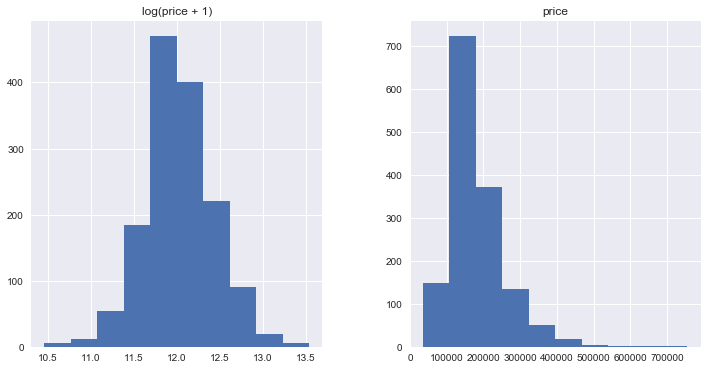

In [213]:
# normalize data
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [214]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [215]:
#split rows that arent comparable
all_data = pd.get_dummies(all_data)

In [216]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [1]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

NameError: name 'all_data' is not defined

In [218]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

Ridge regression rmse with alpha of 0.1 = 0.137775382772


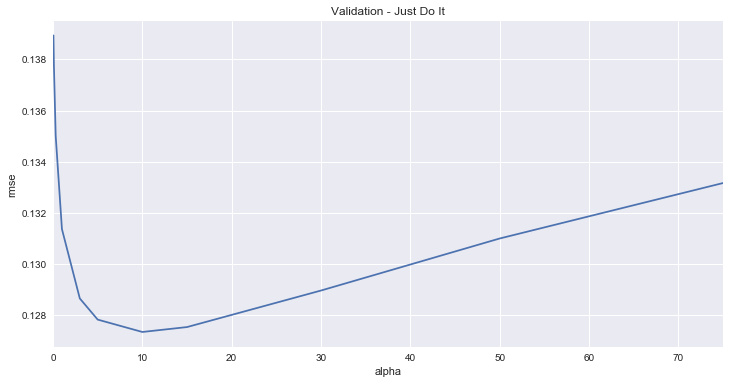

In [219]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_ridge = rmse_cv(Ridge(alpha = 0.1)).mean()
print "Ridge regression rmse with alpha of 0.1 = {}".format(cv_ridge)

### 3. Trying Elastic Net Regression

We tried using Elastic net Regression instead of ridge regression to combine results from both lasso and ridge regression in the most optimal way

In [220]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
cv_elastic = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio = ratio)).mean() 
            for alpha in alphas for ratio in l1_ratios]

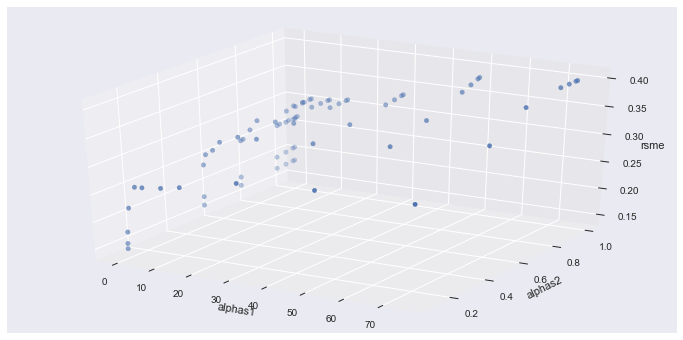

In [221]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
al = [a for a in alphas for _ in range(len(l1_ratios))]
ax.scatter(al,l1_ratios*len(alphas),zs=cv_elastic)
ax.set_xlabel('alphas1')
ax.set_ylabel('alphas2')
ax.set_zlabel('rsme')

In [222]:
model_elastic = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [223]:
rmse_cv(model_elastic).mean()

0.12323152037393163

In [224]:
coef = pd.Series(model_elastic.coef_, index = X_train.columns)

In [225]:
print("ElasticNet picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

ElasticNet picked 116 variables and eliminated the other 172 variables


In [226]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

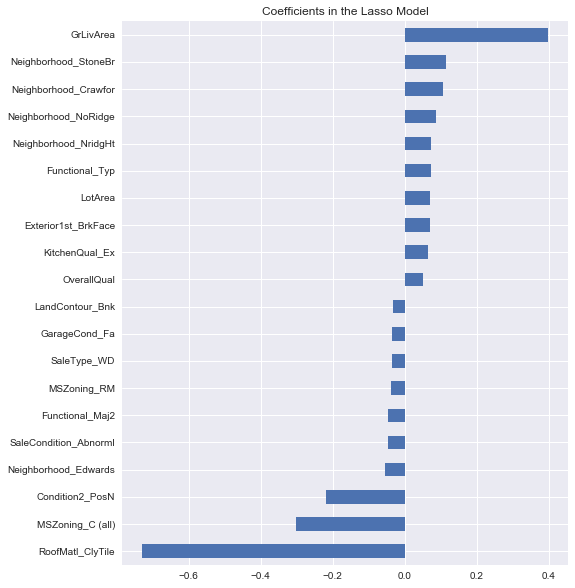

In [227]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

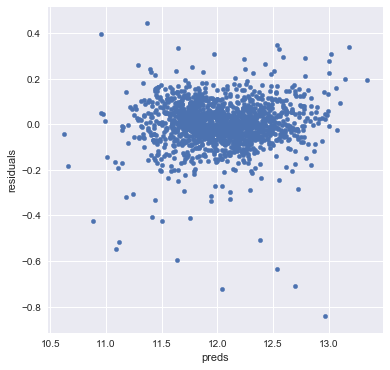

In [228]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_elastic.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Using elastic net, we got better results than ridge regression and lasso alone. We can then calculate the expected values of sales price and export them to a csv file.

In [229]:
elastic_preds = np.expm1(model_elastic.predict(X_test))

In [230]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":elastic_preds},columns = ("id","SalePrice"))
solution.to_csv("kaggle/elastic_sol.csv", index = False)

In [231]:
solution

,id,SalePrice
0,1461,120010.913715
1,1462,151577.027489
2,1463,180243.711076
3,1464,197239.809837
4,1465,202534.056864
5,1466,170518.426387
6,1467,179466.916430
7,1468,159888.873204
8,1469,195596.003409
9,1470,119109.030828


Kaggle score: 0.12093